In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [103]:
NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
X, y = make_blobs(n_samples=1000,
                  centers=NUM_CLASS,
                  n_features=NUM_FEATURES,
                  cluster_std=1.5,
                  random_state=RANDOM_SEED)

In [104]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

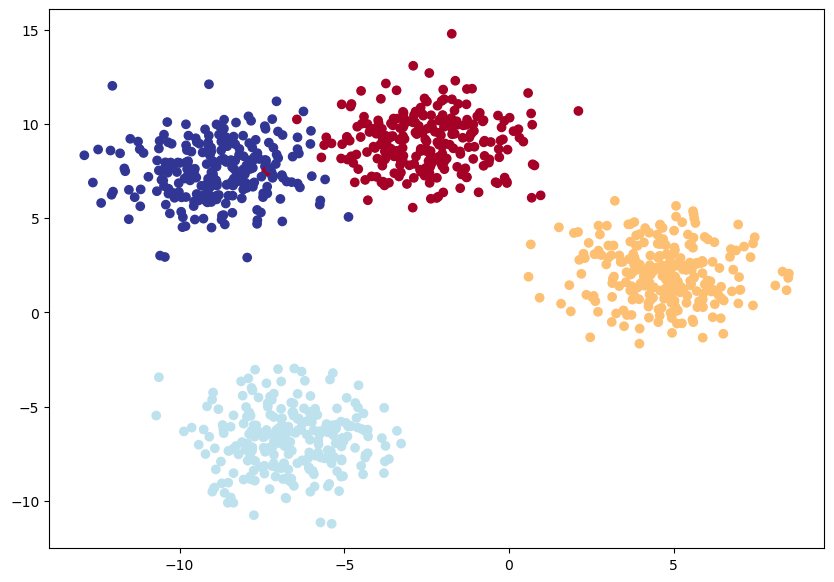

In [106]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [107]:
device = 'mps' if torch.mps.is_available() else 'cpu'
print(f'Using {device} device')

Using mps device


In [108]:
class MulticlassModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model = MulticlassModel(2, 4, 8).to(device)
model

MulticlassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [110]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_test.to(device))

y_logits[:20]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004],
        [-0.1774, -1.1008, -0.8293, -0.2369],
        [-0.9408, -0.7899, -1.8480, -1.3347],
        [-0.2972, -1.3458, -1.1543, -0.3629],
        [-0.2901, -1.3393, -1.1146, -0.3352],
        [-0.3371, -1.4374, -1.2379, -0.3803],
        [-0.1026, -0.9507, -0.6191, -0.1511],
        [-0.0968, -0.9431, -0.5925, -0.1341],
        [ 0.2337, -0.2513,  0.1343,  0.0317],
        [-0.1952, -1.1562, -0.8306, -0.2089],
        [-0.0588, -0.8607, -0.5012, -0.1059]], device='mps:0')

In [111]:
y_train[:20]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2])

In [112]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:20]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360],
        [0.3496, 0.1389, 0.1822, 0.3294],
        [0.3085, 0.3588, 0.1246, 0.2081],
        [0.3688, 0.1292, 0.1565, 0.3454],
        [0.3644, 0.1276, 0.1598, 0.3483],
        [0.3708, 0.1234, 0.1506, 0.3551],
        [0.3358, 0.1438, 0.2004, 0.3200],
        [0.3332, 0.1429, 0.2029, 0.3209],
        [0.2996, 0.1844, 0.2712, 0.2448],
        [0.3450, 0.1320, 0.1827, 0.3403],
        [0.3284, 0.1473, 0.2110, 0.3133]], device='mps:0')

In [113]:
y_pred_probs[0]

tensor([0.3169, 0.3244, 0.1405, 0.2182], device='mps:0')

In [114]:
torch.sum(y_pred_probs[0])

tensor(1., device='mps:0')

In [115]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='mps:0')

In [116]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [117]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [118]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epochs = 500

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits_train = model(X_train)
    train_loss = criterion(y_logits_train, y_train)
    y_preds_train = torch.softmax(y_logits_train, dim=1).argmax(dim=1)
    train_acc = accuracy(y_train, y_preds_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_logits_test = model(X_test)
        test_loss = criterion(y_logits_test, y_test)
        y_preds_test = torch.softmax(y_logits_test, dim=1).argmax(dim=1)
        test_acc = accuracy(y_test, y_preds_test)
    
    if epoch % 20 == 0:
        print(f'Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}')

Epoch: 0 | Loss: 1.15883, Accuracy: 40.38 | Test Loss: 1.09778, Test Accuracy: 46.50
Epoch: 20 | Loss: 0.38183, Accuracy: 98.00 | Test Loss: 0.36981, Test Accuracy: 99.00
Epoch: 40 | Loss: 0.04622, Accuracy: 99.25 | Test Loss: 0.03843, Test Accuracy: 99.50
Epoch: 60 | Loss: 0.02691, Accuracy: 99.25 | Test Loss: 0.01760, Test Accuracy: 99.50
Epoch: 80 | Loss: 0.02456, Accuracy: 99.12 | Test Loss: 0.01451, Test Accuracy: 99.50
Epoch: 100 | Loss: 0.02365, Accuracy: 99.38 | Test Loss: 0.01305, Test Accuracy: 99.50
Epoch: 120 | Loss: 0.02304, Accuracy: 99.38 | Test Loss: 0.01216, Test Accuracy: 99.50
Epoch: 140 | Loss: 0.02255, Accuracy: 99.50 | Test Loss: 0.01150, Test Accuracy: 99.50
Epoch: 160 | Loss: 0.02213, Accuracy: 99.50 | Test Loss: 0.01095, Test Accuracy: 99.50
Epoch: 180 | Loss: 0.02174, Accuracy: 99.50 | Test Loss: 0.01047, Test Accuracy: 99.50
Epoch: 200 | Loss: 0.02138, Accuracy: 99.50 | Test Loss: 0.01004, Test Accuracy: 99.50
Epoch: 220 | Loss: 0.02104, Accuracy: 99.50 | Tes

In [119]:
model.eval()
with torch.inference_mode():
    logits_preds = model(X_test)

logits_preds[:10]

tensor([[-11.3549,   5.3911, -15.2437, -15.4637],
        [ -5.0030,  -9.1302,  -7.9774,   3.0480],
        [ -8.0811,  -7.1519,   5.1828,  -8.9887],
        [-10.1329,   5.2972,  -9.6109, -10.7179],
        [  7.5376,  -7.6750, -11.1167,  -8.7219],
        [ -7.1482, -11.0504,  -9.4245,   4.8159],
        [ -7.6598,  -6.7090,   5.0638,  -8.7744],
        [  4.7722,  -7.2419,  -9.5293,  -6.0158],
        [-10.0696,  -9.1124,   5.2186,  -9.8895],
        [  6.0440,  -6.9530,  -9.6798,  -7.1887]], device='mps:0')

In [120]:
preds_prob = torch.softmax(logits_preds, dim=1).argmax(dim=1)
preds_prob

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='mps:0')

In [121]:
y_preds_test == preds_prob

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [122]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))

    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

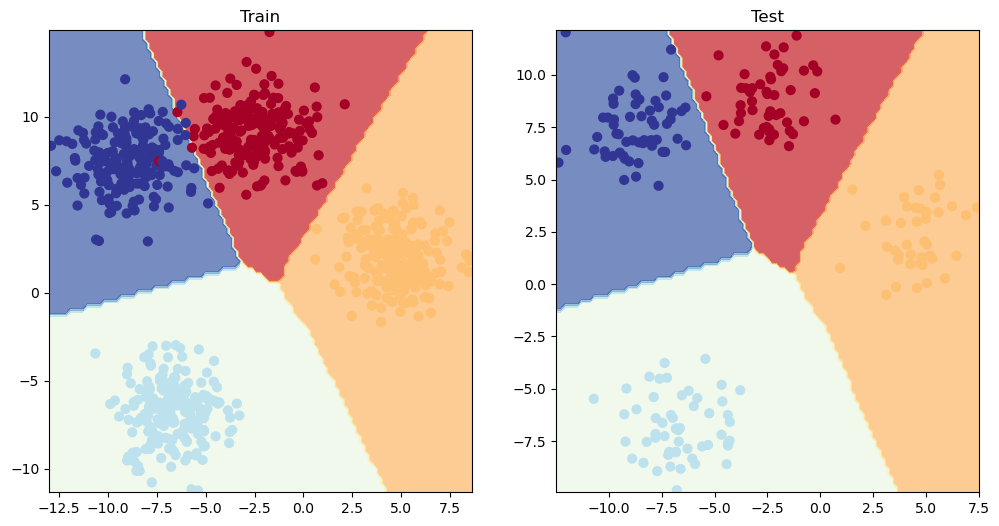

In [123]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [124]:
import torchmetrics

/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/ai/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `t

In [126]:
from torchmetrics.classification import Accuracy

torchmetrics_acc = Accuracy(task="multiclass", num_classes=4).to(device)
torchmetrics_acc(y_preds_test, y_test)

tensor(1., device='mps:0')